Why Use Ensemble Learning?

Ensemble learning is a powerful technique that involves combining two or more machine learning algorithms to make predictions. By leveraging the collective knowledge of multiple models, ensemble learning aims to maximize prediction accuracy. There are various ensemble learning techniques available, such as stacking, bagging, and voting. In this particular code, we will employ the voting average technique as the primary model. Ensemble learning has been extensively studied and proven to be both efficient and effective in various research studies, with some achieving impressive accuracy rates of up to 98%.

When implementing ensemble learning for lung cancer detection for this project, several significant aspects should be considered:

1. Pretrained Models: The VGG16 and ResNet models, which are well-established and widely used deep learning architectures, have already been pretrained. These models have shown exceptional performance in image classification tasks, including lung cancer detection. Their pretraining helps capture relevant features and facilitates the learning process.

2. Model Selection: Among several models tested with a similar dataset, VGG16 and ResNet were chosen as the most suitable options for the ensemble learning approach. This selection process ensures that the models utilized in the ensemble are the most promising ones, maximizing the chances of accurate predictions.

3. Data Source and Storage: The dataset used in this project is sourced from various reputable repositories, including the TCIA repository and Kaggle. These diverse data sources enrich the dataset and contribute to the robustness of the model. The data is conveniently stored in a designated directory on Google Drive, providing easy access during model training and evaluation.

4. Preprocessing and Feature Selection: The data has undergone preprocessing steps to ensure its suitability for the ensemble learning model. Specifically, features selection has been performed using Onis software, which selects the clearest X-ray images. This step aims to enhance the quality of input data and improve the accuracy of the ensemble learning model.

By considering these aspects, we can develop a reliable and effective ensemble learning approach for lung cancer detection. The utilization of pretrained models, careful model selection, diverse and well-preprocessed data, and feature selection contribute to the overall success of the ensemble learning model.

References:

 1. https://ieeexplore.ieee.org/document/9734212

 2. https://ieeexplore.ieee.org/document/9817326

 3. https://link.springer.com/chapter/10.1007/978-3-031-23724-9_15

 4. https://arxiv.org/pdf/2104.02395.pdf







Mounted at /content/gdrive
Found 4411 images belonging to 5 classes.
Found 1100 images belonging to 5 classes.
Found 1061 images belonging to 5 classes.
Classes: ['Adenocarcinoma', 'Large Cell Carcinoma', 'Normal', 'Small Cell Carcinoma', 'Squamous Cell Carcinoma']


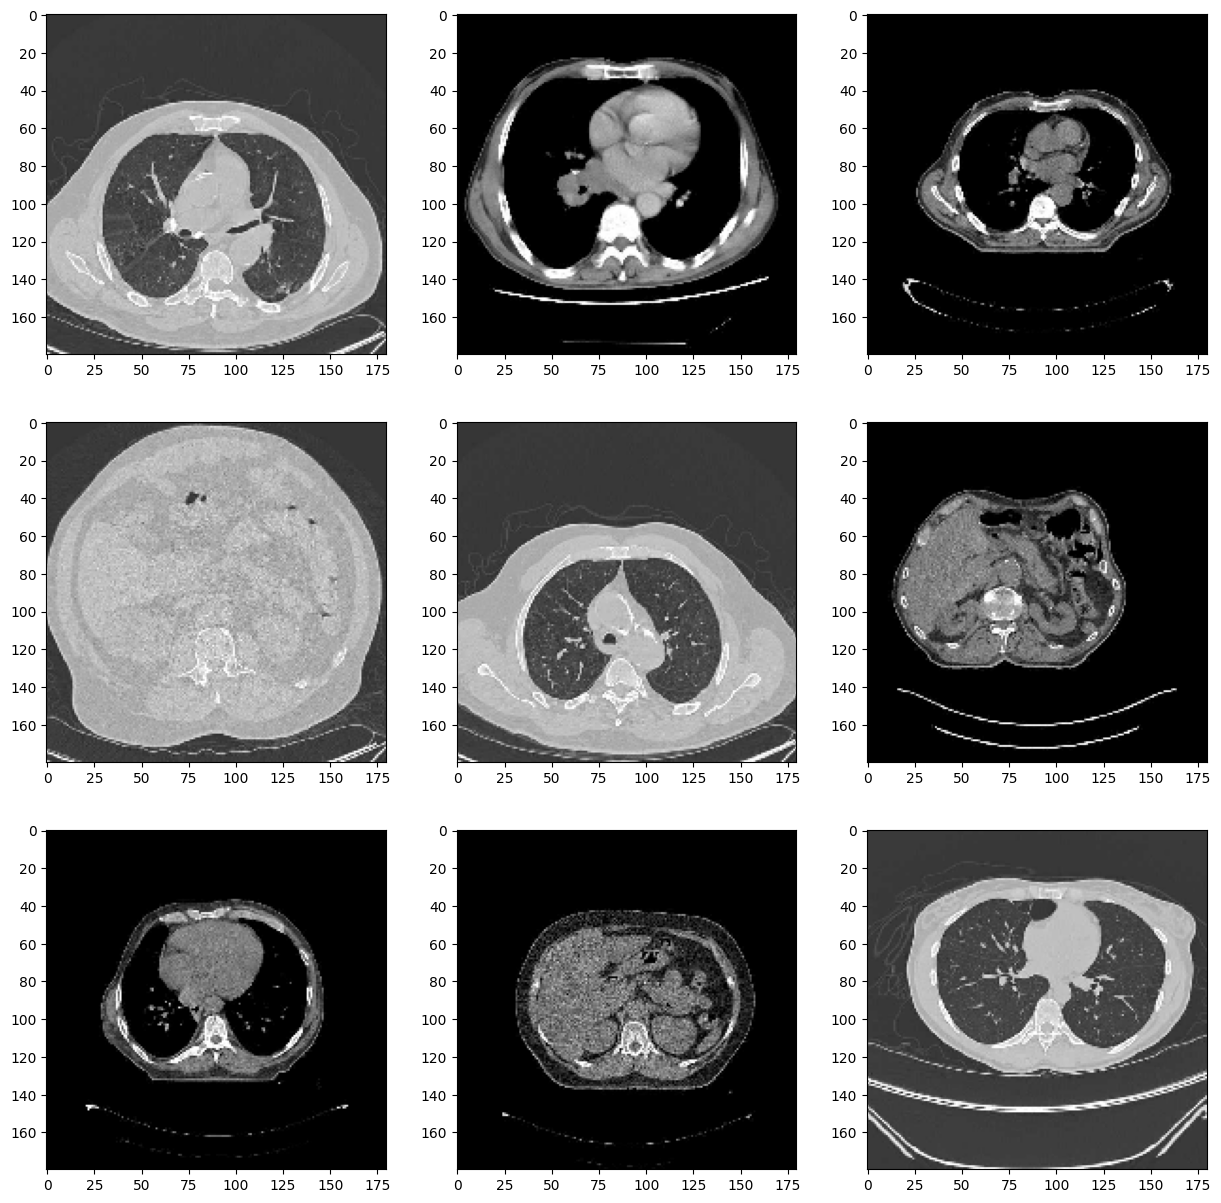

Model: "ensemble"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 name_of_model_1E (Functional)  (None, 5)            59422597    ['input_1[0][0]']                
                                                                                                  
 name_of_model_2E (Functional)  (None, 5)            14979909    ['input_1[0][0]']                
                                                                                                  
 average (Average)              (None, 5)            0           ['name_of_model_1E[0][0]',

137/137 [==============================] - 2716s 20s/step - loss: 0.3355 - accuracy: 0.8004 - val_loss: 0.6117 - val_accuracy: 0.7895
Epoch 2/3
137/137 [==============================] - ETA: 0s - loss: 0.1941 - accuracy: 0.9180 
Epoch 2: val_loss did not improve from 0.61171
137/137 [==============================] - 2669s 19s/step - loss: 0.1941 - accuracy: 0.9180 - val_loss: 0.8121 - val_accuracy: 0.6425
Epoch 3/3
137/137 [==============================] - ETA: 0s - loss: 0.2404 - accuracy: 0.8696 
Epoch 3: val_loss did not improve from 0.61171
137/137 [==============================] - 2654s 19s/step - loss: 0.2404 - accuracy: 0.8696 - val_loss: 0.6375 - val_accuracy: 0.7068


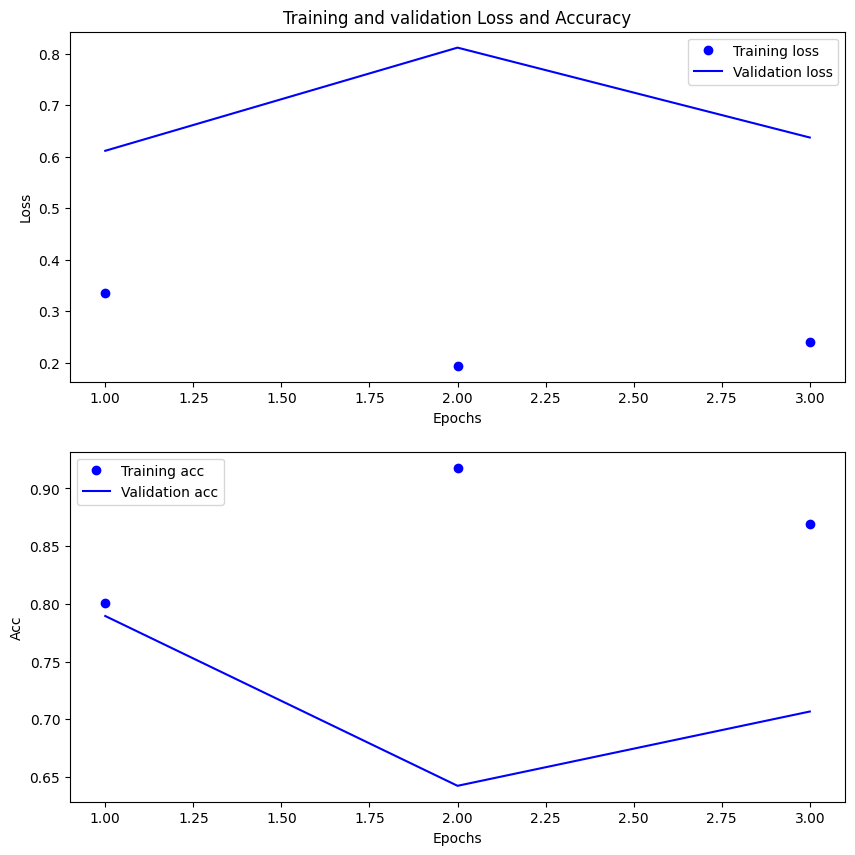

<ipython-input-1-369802fcbce5>:163: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = ensemble_model.evaluate_generator(validation_generator)


Val loss: 0.6342155337333679
Val accuracy: 0.7081817984580994


<ipython-input-1-369802fcbce5>:168: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = ensemble_model.evaluate_generator(test_generator)


Test loss: 0.3442315459251404
Test accuracy: 0.835061252117157


<ipython-input-1-369802fcbce5>:193: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = ensemble_model.predict_generator(test_generator)


Classification Report
                         precision    recall  f1-score   support

         Adenocarcinoma       1.00      1.00      1.00       150
   Large Cell Carcinoma       0.44      0.91      0.60        57
                 Normal       1.00      0.54      0.70       300
   Small Cell Carcinoma       0.89      0.97      0.93       286
Squamous Cell Carcinoma       0.77      0.91      0.83       268

               accuracy                           0.84      1061
              macro avg       0.82      0.87      0.81      1061
           weighted avg       0.88      0.84      0.83      1061



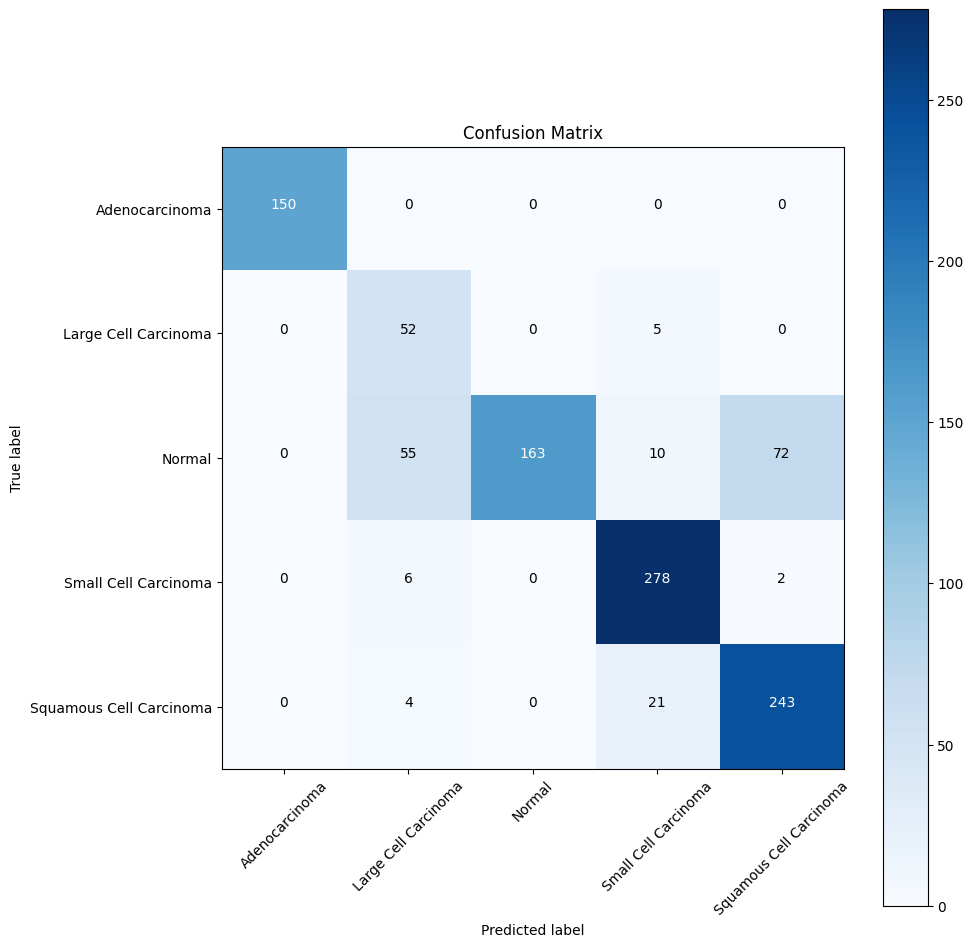

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout, Input, Average
from tensorflow.keras.optimizers import Adam
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import cv2
import os
import shutil
import itertools
import imutils
from matplotlib import pyplot as plt

from google.colab import drive
drive.mount('/content/gdrive')

TRAINING_DIR = '/content/gdrive/MyDrive/FINAL_DATA/Train'
TEST_DIR = '/content/gdrive/MyDrive/FINAL_DATA/Test'

seed = 10

BATCH_SIZE = 32
im_shape = (180, 180)

# Subdivision in test/validation
data_generator = ImageDataGenerator(validation_split=0.2)
val_data_generator = ImageDataGenerator(validation_split=0.2)

# Generator para parte train
train_generator = data_generator.flow_from_directory(
    TRAINING_DIR,
    target_size=im_shape,
    shuffle=True,
    seed=seed,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    subset="training"
)

# Generator para parte validação
validation_generator = val_data_generator.flow_from_directory(
    TRAINING_DIR,
    target_size=im_shape,
    shuffle=False,
    seed=seed,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    subset="validation"
)

# Generator para dataset de teste
test_generator = ImageDataGenerator().flow_from_directory(
    TEST_DIR,
    target_size=im_shape,
    shuffle=False,
    seed=seed,
    class_mode='categorical',
    batch_size=BATCH_SIZE
)

nb_train_samples = train_generator.samples
nb_validation_samples = validation_generator.samples
nb_test_samples = test_generator.samples
classes = list(train_generator.class_indices.keys())
print('Classes: ' + str(classes))
num_classes = len(classes)

# Visualizing some examples
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(330 + 1 + i)
    batch = train_generator.next()[0]
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

# Load models
model_1 = load_model("/content/gdrive/MyDrive/Colab Notebooks/MODEL/Ensemble_comhinatoion'/ResNet1.h5")
model_1 = Model(inputs=model_1.inputs,
                outputs=model_1.outputs,
                name='name_of_model_1E')

model_2 = load_model("/content/gdrive/MyDrive/Colab Notebooks/MODEL/Ensemble_comhinatoion'/modelvgg16_1.h5")
model_2 = Model(inputs=model_2.inputs,
                outputs=model_2.outputs,
                name='name_of_model_2E')

models = [model_1, model_2]
model_input = Input(shape=(180, 180, 3))
model_outputs = [model(model_input) for model in models]
ensemble_output = Average()(model_outputs)
ensemble_model = Model(inputs=model_input, outputs=ensemble_output, name='ensemble')

ensemble_model.summary()

# Compile the model
ensemble_model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

epochs = 3

# Callback to save the best model
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='/content/gdrive/MyDrive/model/name_of_model_1',
        monitor='val_loss',
        save_best_only=True,
        verbose=1
    ),
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        verbose=1
    )
]

# Training
history = ensemble_model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // BATCH_SIZE,
    epochs=epochs,
    callbacks=callbacks_list,
    validation_data=validation_generator,
    verbose=1,
    validation_steps=nb_validation_samples // BATCH_SIZE
)

# Training curves
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs_x = range(1, len(loss_values) + 1)
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(epochs_x, loss_values, 'bo', label='Training loss')
plt.plot(epochs_x, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(2, 1, 2)
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs_x, acc_values, 'bo', label='Training acc')
plt.plot(epochs_x, val_acc_values, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

# Save the model
tf.saved_model.save(ensemble_model, 'FINAL_ENS')

# Using the validation dataset
score = ensemble_model.evaluate_generator(validation_generator)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

# Using the test dataset
score = ensemble_model.evaluate_generator(test_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Plot the confusion matrix
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Calculate predictions on test dataset
Y_pred = ensemble_model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
target_names = classes

# Calculate confusion matrix
cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')

# Classification Report
from sklearn.metrics import classification_report
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))
